In [7]:
import numpy as np
x = var("x")

### Заданное уравнение:

y'' - 4xy' + (4*x^2 - 2)y = 0

y(0) == 1  
y'(0) == 1  
x in [0,1], h = 0.1

In [6]:
#точное решение
f = (1+x)*e**(x**2)

y' = z  
z' = 4xz - (4x^2-2)y  
y(0) == 1  
z(0) == 1  

In [5]:
x,y,z = var("x,y,z")
fy = z
fz = 4*x*z - (4*x**2-2)*y
h = 0.1
a = 0
b = 1
y0 = 1
z0 = 1

In [1]:
def runge_kutta_4(x0,xl,y0,z0,h,eps = 0.001):
    xcur = x0 #идем из 0 с шагом h
    ycur = y0
    zcur = z0


    result = [(xcur,ycur,zcur)]

    while xcur + h < xl + eps:

        K1 = h*fy(x = xcur,y = ycur, z = zcur)
        L1 = h*fz(x = xcur,y = ycur, z = zcur)

        K2 = h*fy(x = xcur + 0.5*h,y = ycur + 0.5*K1, z = zcur + 0.5*L1)
        L2 = h*fz(x = xcur + 0.5*h,y = ycur + 0.5*K1, z = zcur + 0.5*L1)

        K3 = h*fy(x = xcur + 0.5*h,y = ycur + 0.5*K2, z = zcur + 0.5*L2)
        L3 = h*fz(x = xcur + 0.5*h,y = ycur + 0.5*K2, z = zcur + 0.5*L2)

        K4 = h*fy(x = xcur + h,y = ycur + K3, z = zcur + L3)
        L4 = h*fz(x = xcur + h,y = ycur + K3, z = zcur + L3)

        dy = (1/6)*(K1 + 2*K2 + 2*K3 + K4)
        dz = (1/6)*(L1 + 2*L2 + 2*L3 + L4)


        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result 

Решаем методом РК4

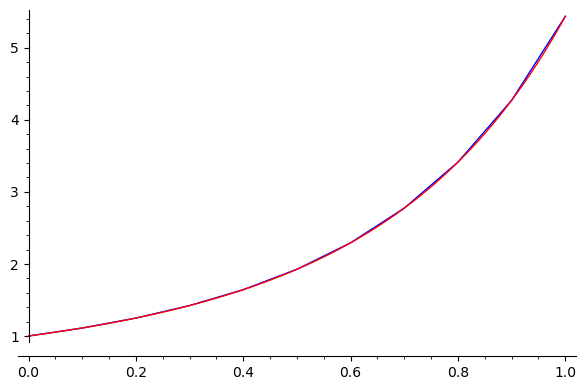

In [9]:
res = runge_kutta_4(a,b,y0,z0,0.1)
l1 = ([(a[0],a[1]) for a in res])
show(line(l1) + plot(f,color = "red",xmin = 0,xmax = 1))

In [15]:
def vaWith0 (pts, p,eps = 1e-5):
    for k in pts:
        if(abs(k[0] - p) < eps):#runge_kutta_4
            return k[1]

def errSqAvg(func,pts): #счет средней разности
    sum = 0
    for i in range(len(pts)):
        
        sum += abs(pts[i][1] - func(x = pts[i][0]))
    return sum/len(pts)

def errSqAvgRR(func,pts1,pts2): #счет средней разности
    sum = 0
    for i in range(len(pts1)):
        
        sum += abs(pts1[i][1] - func(p = pts1[i][0],pts = pts2))
    return sum/len(pts1)

def runge_rumbert_error(res1, #менее точный результат
                        res2, #более точный результат
                        k, #различие в шаге (k2/k1)
                        order): #порядок точности метода
    #счет ошибки методом Рунге-Ромберга
    dif = errSqAvgRR(vaWith0,res1,res2)
    err = (dif)/(k**order - 1)
    
    return abs(err)

In [39]:
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(f,runge_kutta_4(a,b,y0,z0,h)).n(digits = 10)))
show("Ошибка (Рунге-Ромберг | 0.01) = {}".format(runge_rumbert_error(runge_kutta_4(a,b,y0,z0,h),runge_kutta_4(a,b,y0,z0,h*0.1),0.01,4).n(digits = 10)))

'Ошибка (сравнение с истинным решением) = 0.00008772534833'

'Ошибка (Рунге-Ромберг | 0.01) = 0.00008771491126'

In [3]:
def euler(x0,xl,y0,z0,h,eps = 0.01): #первый улучшенный 2 порядок
    xcur = x0 #идем из 0 с шагом h
    ycur = y0
    zcur = z0


    result = [(xcur,ycur,zcur)]

    while xcur + h < xl + eps:

        dhx = h/2
        dhy = (h/2)*fy(x = xcur,y = ycur, z = zcur)
        dhz = (h/2)*fz(x = xcur,y = ycur, z = zcur)
        
        dy = h*fy(x = xcur + dhx,y = ycur + dhy, z = zcur + dhz)
        dz = h*fz(x = xcur + dhx,y = ycur + dhy, z = zcur + dhz)


        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result 

In [14]:
h1 = 0.01

https://ru.wikipedia.org/wiki/Метод_Эйлера

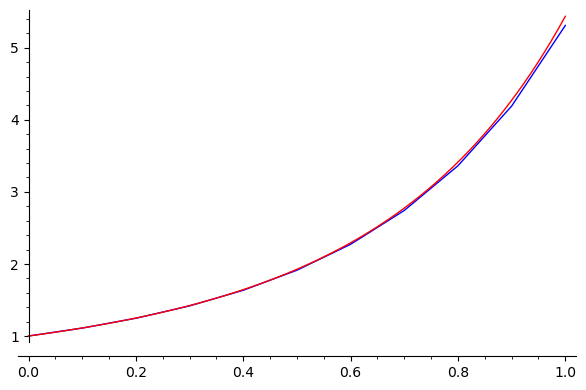

In [8]:
res = euler(a,b,y0,z0,0.1)

l1 = ([(a[0],a[1]) for a in res])
show(line(l1) + plot(f,color = "red",xmin = 0,xmax = 1))

In [16]:
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(f,euler(a,b,y0,z0,h)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.01) = {}".format(runge_rumbert_error(euler(a,b,y0,z0,h),euler(a,b,y0,z0,h*0.01),0.01,2).n(digits = 4)))

'Ошибка (сравнение с истинным решением) = 0.03102'

'Ошибка (Рунге-Ромберг | 0.01) = 0.03102'

In [17]:
def euler_koshi(x0,xl,y0,z0,h,eps = 0.01): #Эйлер - Коши | 2 порядок
    xcur = x0 #идем из 0 с шагом h
    ycur = y0
    zcur = z0


    result = [(xcur,ycur,zcur)]

    while xcur + h < xl + eps:

        dx = h
        estdy = (h)*fy(x = xcur,y = ycur, z = zcur)
        estdz = (h)*fz(x = xcur,y = ycur, z = zcur)
        
        dy = (h/2)*(fy(x = xcur,y = ycur, z = zcur) + fy(x = xcur + dx,y = ycur + estdy, z = zcur + estdz))
        dz = (h/2)*(fz(x = xcur,y = ycur, z = zcur) + fz(x = xcur + dx,y = ycur + estdy, z = zcur + estdz))


        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result 

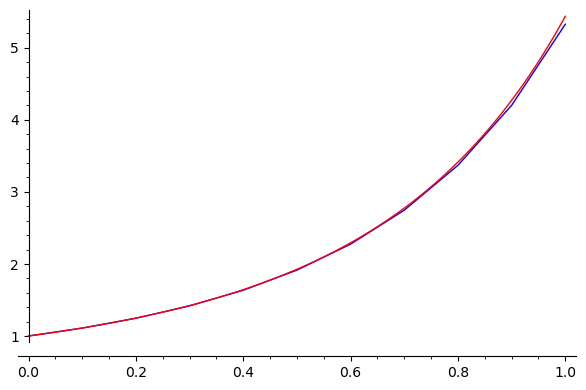

In [18]:
res = euler_koshi(a,b,y0,z0,0.1)

l1 = ([(a[0],a[1]) for a in res])
show(line(l1) + plot(f,color = "red",xmin = 0,xmax = 1))

In [19]:
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(f,euler_koshi(a,b,y0,z0,h)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.01) = {}".format(runge_rumbert_error(euler_koshi(a,b,y0,z0,h),euler_koshi(a,b,y0,z0,h*0.01),0.01,2).n(digits = 4)))

'Ошибка (сравнение с истинным решением) = 0.02710'

'Ошибка (Рунге-Ромберг | 0.01) = 0.02710'

In [11]:
def adams(x0,xl,y0,z0,h,start = 0.4,start_method = euler,eps = 0.01):
   
    startlen = (start*(xl - x0)) 
    if(startlen/h < 4): #надо пройти хотя бы 4 точки
        startlen = h*4
        
        
    result = start_method(x0,startlen,y0,z0,h) #старт
    
    l = len(result)
    
    xcur = result[l-1][0]
    ycur = result[l-1][1]
    zcur = result[l-1][2]
        
    while xcur + h <= xl + eps:
        l = len(result)
        
        fyk1 = fy(x = result[l-1][0],y = result[l-1][1], z = result[l-1][2])
        fzk1 = fz(x = result[l-1][0],y = result[l-1][1], z = result[l-1][2])
        
        fyk2 = fy(x = result[l-2][0],y = result[l-2][1], z = result[l-2][2])
        fzk2 = fz(x = result[l-2][0],y = result[l-2][1], z = result[l-2][2])
        
        fyk3 = fy(x = result[l-3][0],y = result[l-3][1], z = result[l-3][2])
        fzk3 = fz(x = result[l-3][0],y = result[l-3][1], z = result[l-3][2])
        
        fyk4 = fy(x = result[l-4][0],y = result[l-4][1], z = result[l-4][2])
        fzk4 = fz(x = result[l-4][0],y = result[l-4][1], z = result[l-4][2])
        
        dy = h/(24)*(55*fyk1 - 59*fyk2 + 37*fyk3 - 9*fyk4)
        dz = h/(24)*(55*fzk1 - 59*fzk2 + 37*fzk3 - 9*fzk4)
        

        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result

In [12]:
def adams_bashforth(x0,xl,y0,z0,h,start = 0.4,start_method = euler,eps = 0.01):
   
    startlen = (start*(xl - x0)) 
    if(startlen/h < 4): #надо пройти хотя бы 4 точки
        startlen = h*4
        
        
    result = start_method(x0,startlen,y0,z0,h) #старт
    
    l = len(result)
    
    xcur = result[l-1][0]
    ycur = result[l-1][1]
    zcur = result[l-1][2]
        
    while xcur + h <= xl + eps:
        l = len(result)
        
        fyk1 = fy(x = result[l-1][0],y = result[l-1][1], z = result[l-1][2])
        fzk1 = fz(x = result[l-1][0],y = result[l-1][1], z = result[l-1][2])
        
        fyk2 = fy(x = result[l-2][0],y = result[l-2][1], z = result[l-2][2])
        fzk2 = fz(x = result[l-2][0],y = result[l-2][1], z = result[l-2][2])
        
        fyk3 = fy(x = result[l-3][0],y = result[l-3][1], z = result[l-3][2])
        fzk3 = fz(x = result[l-3][0],y = result[l-3][1], z = result[l-3][2])
        
        fyk4 = fy(x = result[l-4][0],y = result[l-4][1], z = result[l-4][2])
        fzk4 = fz(x = result[l-4][0],y = result[l-4][1], z = result[l-4][2])
        
        dpy = h/(24)*(55*fyk1 - 59*fyk2 + 37*fyk3 - 9*fyk4)
        dpz = h/(24)*(55*fzk1 - 59*fzk2 + 37*fzk3 - 9*fzk4)
        
                
        fpy = fy(x = xcur + h, y = ycur + dpy,z = zcur + dpz)
        fpz = fz(x = xcur + h, y = ycur + dpy,z = zcur + dpz)
        
        dy = (h/24)*(9*fpy + 19*fyk1 - 5*fyk2 + fyk3)
        dz = (h/24)*(9*fpz + 19*fzk1 - 5*fzk2 + fzk3)

        xcur = xcur + h
        ycur = ycur + dy
        zcur = zcur + dz

        result.append((xcur.n(),ycur.n(),zcur.n()))

    return result

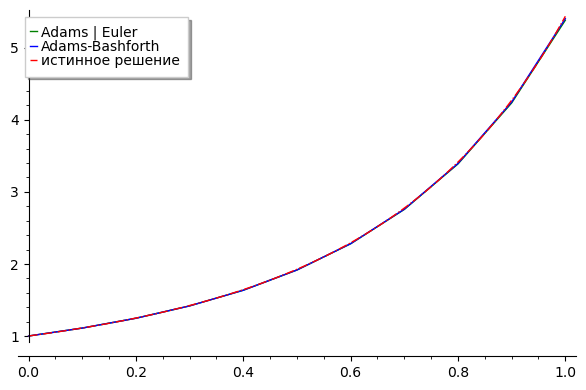

In [13]:
h = 0.1

res1 = adams(a,b,y0,z0,h,start = 0.1, start_method = euler)
res2 = adams_bashforth(a,b,y0,z0,h,start = 0.1, start_method = euler)

l1 = ([(a[0],a[1]) for a in res1])
l2 = ([(a[0],a[1]) for a in res2])
show(line(l1,color = "green",legend_label = "Adams | Euler") + 
     line(l2,color = "blue",legend_label = "Adams-Bashforth") + 
     plot(f,color = "red",xmin = 0,xmax = 1,linestyle = "-.",legend_label =  "истинное решение"))

In [16]:
show("Метод адамса, старт Эйлером")
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(f,adams(a,b,y0,z0,h,start = 0.1)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.05) = {}".format(runge_rumbert_error(adams(a,b,y0,z0,h,start = 0.1),adams(a,b,y0,z0,h*0.1,start = 0.1),0.1,4).n(digits = 4)))

'Метод адамса, старт Эйлером'

'Ошибка (сравнение с истинным решением) = 0.01615'

'Ошибка (Рунге-Ромберг | 0.05) = 0.01613'

In [17]:
show("Метод адамса с предиктором и корректором")
show("Ошибка (сравнение с истинным решением) = {}".format(errSqAvg(f,adams_bashforth(a,b,y0,z0,h,start = 0.1)).n(digits = 4)))
show("Ошибка (Рунге-Ромберг | 0.05) = {}".format(runge_rumbert_error(adams_bashforth(a,b,y0,z0,h,start = 0.1),adams_bashforth(a,b,y0,z0,h*0.1,start = 0.1),0.1,4).n(digits = 4)))

'Метод адамса с предиктором и корректором'

'Ошибка (сравнение с истинным решением) = 0.01176'

'Ошибка (Рунге-Ромберг | 0.05) = 0.01174'